<a href="https://colab.research.google.com/github/StanleyNyadzayo/eee408labs/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

In [ ]:
!pip install findspark
import findspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.json("/content/drive/MyDrive/Colab Notebooks/data.json")
df.show()

+----+------+
| age|  name|
+----+------+
|NULL|  Carl|
|  30|Rachel|
|  19|  Paul|
+----+------+



In [ ]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
df.columns

['age', 'name']

In [ ]:
from pyspark.sql.types import (StructField, StringType, IntegerType, StructType)
data_schema = [StructField('age', IntegerType(), True), StructField('name', StringType(), True)]
final_structure = StructType(fields = data_schema)
df = spark.read.json("/content/drive/MyDrive/Colab Notebooks/data.json", schema=final_structure)
df.printSchema()

# The data type changed from long to int

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
df.select('age').show()

+----+
| age|
+----+
|NULL|
|  30|
|  19|
+----+



In [ ]:
df.head(3)

[Row(age=None, name='Carl'),
 Row(age=30, name='Rachel'),
 Row(age=19, name='Paul')]

In [ ]:
df.head(3)[0]

Row(age=None, name='Carl')

In [ ]:
df.head(3) [2]
# the purpose of .head() method is to retrieve the first n rows of the data frame

Row(age=19, name='Paul')

In [ ]:
df.select(['name', 'age']).show()

+------+----+
|  name| age|
+------+----+
|  Carl|NULL|
|Rachel|  30|
|  Paul|  19|
+------+----+



In [ ]:
df.withColumn('trueage',df['age']).show()

+----+------+-------+
| age|  name|trueage|
+----+------+-------+
|NULL|  Carl|   NULL|
|  30|Rachel|     30|
|  19|  Paul|     19|
+----+------+-------+



In [ ]:
df.withColumn('trueage',df['age']+2).show()

+----+------+-------+
| age|  name|trueage|
+----+------+-------+
|NULL|  Carl|   NULL|
|  30|Rachel|     32|
|  19|  Paul|     21|
+----+------+-------+



In [ ]:
df.show()

+----+------+
| age|  name|
+----+------+
|NULL|  Carl|
|  30|Rachel|
|  19|  Paul|
+----+------+



In [ ]:
# Assign the result of withColumn back to df
df = df.withColumn('trueage', df['age'] + 2)

# Now show the updated DataFrame
df.show()

+----+------+-------+
| age|  name|trueage|
+----+------+-------+
|NULL|  Carl|   NULL|
|  30|Rachel|     32|
|  19|  Paul|     21|
+----+------+-------+



In [ ]:
df.withColumnRenamed('age', 'new_age').show()
# This is not a premanemnt change because I tried to run without renaming and it did not show the new name

+-------+------+-------+
|new_age|  name|trueage|
+-------+------+-------+
|   NULL|  Carl|   NULL|
|     30|Rachel|     32|
|     19|  Paul|     21|
+-------+------+-------+



In [ ]:
df.createOrReplaceTempView('data_table')
query = spark.sql("SELECT * FROM data_table")
query.show()

+----+------+-------+
| age|  name|trueage|
+----+------+-------+
|NULL|  Carl|   NULL|
|  30|Rachel|     32|
|  19|  Paul|     21|
+----+------+-------+



In [ ]:
new_query = spark.sql("SELECT * FROM data_table WHERE age = 19")
new_query.show()

+---+----+-------+
|age|name|trueage|
+---+----+-------+
| 19|Paul|     21|
+---+----+-------+



In [ ]:
new_query = spark.sql("SELECT * FROM data_table WHERE age > 19")
new_query.show()

+---+------+-------+
|age|  name|trueage|
+---+------+-------+
| 30|Rachel|     32|
+---+------+-------+



In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Data Understanding").getOrCreate()
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/StockMarketData.csv", header=True, inferSchema=True)
df.printSchema()


root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
df.show()

+----------+----------+----------+----------+----------+---------+---------+
|      Date|      Open|      High|       Low|     Close|   Volume|Adj Close|
+----------+----------+----------+----------+----------+---------+---------+
|02/01/2014|555.680008|557.029999|552.020004| 553.12999| 58671200|74.115916|
|03/01/2014|552.860023|553.699989|540.429993|540.980019| 98116900|72.487897|
|06/01/2014|537.450005|546.800018|533.599983|543.929993|103152700|72.883175|
|07/01/2014|544.320015|545.959999|537.919975|540.040024| 79302300|72.361944|
|08/01/2014|538.809982| 545.55999| 538.68998|543.460022| 64632400|72.820202|
|09/01/2014|546.800018|546.859993|535.349983|536.519997| 69787200|71.890282|
|10/01/2014|539.829979|540.799988|531.109993|532.939995| 76244000|71.410585|
|13/01/2014|529.910019|     542.5|529.880005|535.730019| 94623200| 71.78443|
|14/01/2014|538.220009|546.730003|537.659996|546.390022| 83140400|73.212803|
|15/01/2014|553.520012|560.200005|551.659996|557.359993| 97909700| 74.68271|

In [ ]:
df.show(3) # Parameters in .show() control the output

+----------+----------+----------+----------+----------+---------+---------+
|      Date|      Open|      High|       Low|     Close|   Volume|Adj Close|
+----------+----------+----------+----------+----------+---------+---------+
|02/01/2014|555.680008|557.029999|552.020004| 553.12999| 58671200|74.115916|
|03/01/2014|552.860023|553.699989|540.429993|540.980019| 98116900|72.487897|
|06/01/2014|537.450005|546.800018|533.599983|543.929993|103152700|72.883175|
+----------+----------+----------+----------+----------+---------+---------+
only showing top 3 rows



In [ ]:
df.filter("High < 600").show(10)

+----------+----------+----------+----------+----------+---------+---------+
|      Date|      Open|      High|       Low|     Close|   Volume|Adj Close|
+----------+----------+----------+----------+----------+---------+---------+
|02/01/2014|555.680008|557.029999|552.020004| 553.12999| 58671200|74.115916|
|03/01/2014|552.860023|553.699989|540.429993|540.980019| 98116900|72.487897|
|06/01/2014|537.450005|546.800018|533.599983|543.929993|103152700|72.883175|
|07/01/2014|544.320015|545.959999|537.919975|540.040024| 79302300|72.361944|
|08/01/2014|538.809982| 545.55999| 538.68998|543.460022| 64632400|72.820202|
|09/01/2014|546.800018|546.859993|535.349983|536.519997| 69787200|71.890282|
|10/01/2014|539.829979|540.799988|531.109993|532.939995| 76244000|71.410585|
|13/01/2014|529.910019|     542.5|529.880005|535.730019| 94623200| 71.78443|
|14/01/2014|538.220009|546.730003|537.659996|546.390022| 83140400|73.212803|
|15/01/2014|553.520012|560.200005|551.659996|557.359993| 97909700| 74.68271|

In [ ]:
df.filter("High < 600").select("Open").show(12)

+----------+
|      Open|
+----------+
|555.680008|
|552.860023|
|537.450005|
|544.320015|
|538.809982|
|546.800018|
|539.829979|
|529.910019|
|538.220009|
|553.520012|
|554.900017|
|551.480019|
+----------+
only showing top 12 rows



In [ ]:
df.filter("High < 600").select("Open", "Volume").show()

+----------+---------+
|      Open|   Volume|
+----------+---------+
|555.680008| 58671200|
|552.860023| 98116900|
|537.450005|103152700|
|544.320015| 79302300|
|538.809982| 64632400|
|546.800018| 69787200|
|539.829979| 76244000|
|529.910019| 94623200|
|538.220009| 83140400|
|553.520012| 97909700|
|554.900017| 57319500|
|551.480019|106684900|
|540.990005| 82131700|
|550.910019| 94996300|
| 549.94001|100809800|
|554.000023|107338700|
|    550.07|138719700|
|508.760002|266380800|
|503.950012|125702500|
|502.539993|169625400|
+----------+---------+
only showing top 20 rows



In [ ]:
df.filter(df["High"] > 600).show(10)

+----------+----------+----------+----------+----------+--------+---------+
|      Date|      Open|      High|       Low|     Close|  Volume|Adj Close|
+----------+----------+----------+----------+----------+--------+---------+
|05/05/2014|590.140022|600.999977|589.999992|600.959976|71766800|81.006831|
|06/05/2014|601.799995|604.409988|594.410027|594.410027|93641100|80.123926|
|19/05/2014|597.849998|607.330002|597.329987|604.590019|79438800|81.951331|
|20/05/2014|604.510017|606.399994|600.730011|604.710022|58709000|81.967597|
|21/05/2014|603.830002|606.699974|602.059975|606.310005|49214900|82.184472|
|22/05/2014|606.599998|609.850006|604.100021|607.269974|50190000|82.314595|
|23/05/2014|    607.25|614.730011|606.470009|614.129997|58052400|83.244461|
|27/05/2014|615.879997|625.859985|615.630005| 625.63002|87216500|84.803273|
|28/05/2014|626.019989|629.830009|623.779991| 624.01001|78870400|84.583683|
|29/05/2014|627.849991| 636.87001|627.769989| 635.37999|94118500|86.124868|
+----------+

In [ ]:
df.filter(df["High"] > 600).select("Low").show(12)

+----------+
|       Low|
+----------+
|589.999992|
|594.410027|
|597.329987|
|600.730011|
|602.059975|
|604.100021|
|606.470009|
|615.630005|
|623.779991|
|627.769989|
|628.900002|
|622.500015|
+----------+
only showing top 12 rows



In [ ]:
df.filter( (df["High"] > 500) & (df["High"] < 600) ).show()

+----------+----------+----------+----------+----------+---------+---------+
|      Date|      Open|      High|       Low|     Close|   Volume|Adj Close|
+----------+----------+----------+----------+----------+---------+---------+
|02/01/2014|555.680008|557.029999|552.020004| 553.12999| 58671200|74.115916|
|03/01/2014|552.860023|553.699989|540.429993|540.980019| 98116900|72.487897|
|06/01/2014|537.450005|546.800018|533.599983|543.929993|103152700|72.883175|
|07/01/2014|544.320015|545.959999|537.919975|540.040024| 79302300|72.361944|
|08/01/2014|538.809982| 545.55999| 538.68998|543.460022| 64632400|72.820202|
|09/01/2014|546.800018|546.859993|535.349983|536.519997| 69787200|71.890282|
|10/01/2014|539.829979|540.799988|531.109993|532.939995| 76244000|71.410585|
|13/01/2014|529.910019|     542.5|529.880005|535.730019| 94623200| 71.78443|
|14/01/2014|538.220009|546.730003|537.659996|546.390022| 83140400|73.212803|
|15/01/2014|553.520012|560.200005|551.659996|557.359993| 97909700| 74.68271|

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Data Groupings").getOrCreate()
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Customers.csv", header=True, inferSchema=True)
df.show()

+----+------+--------------+---------------+
| Age|Gender|Payment Method|Future Customer|
+----+------+--------------+---------------+
|64.0|  male|   credit card|            yes|
|35.0|  male|        cheque|            yes|
|25.0|female|   credit card|            yes|
|39.0|female|   credit card|             no|
|39.0|  male|   credit card|            yes|
|28.0|female|        cheque|             no|
|21.0|female|   credit card|            yes|
|48.0|  male|   credit card|            yes|
|70.0|female|   credit card|             no|
|36.0|  male|   credit card|            yes|
|22.0|  male|   credit card|            yes|
|53.0|female|          cash|             no|
|27.0|  male|          cash|            yes|
|40.0|  male|   credit card|            yes|
|22.0|  male|          cash|            yes|
|49.0|female|   credit card|             no|
|24.0|female|          cash|             no|
|45.0|  male|   credit card|            yes|
|45.0|  male|   credit card|            yes|
|66.0|fema

In [ ]:
df.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Future Customer: string (nullable = true)



In [ ]:
df.groupBy('Gender').mean().show()

+------+--------+
|Gender|avg(Age)|
+------+--------+
|female|    45.6|
|  male|   45.78|
+------+--------+



In [ ]:
df.groupBy('Gender').count().show()

+------+-----+
|Gender|count|
+------+-----+
|female|  450|
|  male|  550|
+------+-----+



In [ ]:
df.groupBy('Gender').min().show()
# Group by separates data values of the specified type into rows that show the the gender in this case and showing the minimum age. Other functions can be used.

+------+--------+
|Gender|min(Age)|
+------+--------+
|female|    17.0|
|  male|    17.0|
+------+--------+



In [ ]:
df.groupBy('Gender').max().show()

+------+--------+
|Gender|max(Age)|
+------+--------+
|female|    91.0|
|  male|    91.0|
+------+--------+



In [ ]:
df.groupBy('Gender').sum().show()

+------+--------+
|Gender|sum(Age)|
+------+--------+
|female| 20520.0|
|  male| 25179.0|
+------+--------+



In [ ]:
# When using groupBy, there can be a combination of columns
df.groupBy('Gender', 'Age').sum().show(10)

+------+----+--------+
|Gender| Age|sum(Age)|
+------+----+--------+
|female|48.0|   240.0|
|  male|80.0|   160.0|
|  male|56.0|   616.0|
|female|64.0|   512.0|
|female|79.0|    79.0|
|  male|64.0|   512.0|
|female|55.0|   660.0|
|  male|90.0|   630.0|
|  male|25.0|   200.0|
|  male|41.0|   410.0|
+------+----+--------+
only showing top 10 rows



In [ ]:
df.groupBy('Gender', 'Payment Method').count().show()

+------+--------------+-----+
|Gender|Payment Method|count|
+------+--------------+-----+
|female|          cash|  119|
|  male|        cheque|   34|
|female|   credit card|  297|
|female|        cheque|   34|
|  male|          cash|  161|
|  male|   credit card|  355|
+------+--------------+-----+



In [ ]:


df.groupBy('Gender').agg(mean('Age'), count('Gender')).show()
# agg is used to perform multiple aggregation operations in a data frame after grouping with groupBy()

+------+--------+-------------+
|Gender|avg(Age)|count(Gender)|
+------+--------+-------------+
|female|    45.6|          450|
|  male|   45.78|          550|
+------+--------+-------------+



In [ ]:
df.agg({'Age': 'max'})

DataFrame[max(Age): double]

In [ ]:
df.agg({'Age': 'max'}).show()

+--------+
|max(Age)|
+--------+
|    91.0|
+--------+



In [ ]:
 df.agg({'Age': 'sum'}).show()

+--------+
|sum(Age)|
+--------+
| 45699.0|
+--------+



In [ ]:
 df.agg({'Age': 'min'}).show()

+--------+
|min(Age)|
+--------+
|    17.0|
+--------+



In [ ]:
# Aggregation with groupBy()
gender_age_data = df.groupBy('Gender')
gender_age_data.agg({'Age': 'max'}).show()

# groupBY() helps in divinding the data correctly and agg does the functions selected for example a calculation of the age sum or max age

+------+--------+
|Gender|max(Age)|
+------+--------+
|female|    91.0|
|  male|    91.0|
+------+--------+



In [ ]:
gender_age_data.agg({'Age': 'min'}).show()

+------+--------+
|Gender|min(Age)|
+------+--------+
|female|    17.0|
|  male|    17.0|
+------+--------+



In [ ]:
gender_age_data.agg({'Age': 'sum'}).show()

+------+--------+
|Gender|sum(Age)|
+------+--------+
|female| 20520.0|
|  male| 25179.0|
+------+--------+



In [ ]:
gender_age_data.agg({'Age': 'mean'}).show()

+------+--------+
|Gender|avg(Age)|
+------+--------+
|female|    45.6|
|  male|   45.78|
+------+--------+



In [ ]:
df.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Future Customer: string (nullable = true)



In [ ]:
# Example for Spark by examples
import numpy as np
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [
    ("James", "CA", np.nan), ("Julia", "", None),
    ("Ram", None, 200.0), ("Ramya", "NULL", np.nan)
]
df = spark.createDataFrame(data,["name", "state", "salary"])
df.show()

+-----+-----+------+
| name|state|salary|
+-----+-----+------+
|James|   CA|   NaN|
|Julia|     |  NULL|
|  Ram| NULL| 200.0|
|Ramya| NULL|   NaN|
+-----+-----+------+



In [ ]:
# find count of NULL, none, nana of all dataFrames columns
from pyspark.sql.functions import col, isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----+-----+------+
|name|state|salary|
+----+-----+------+
|   0|    1|     3|
+----+-----+------+



In [ ]:
# Data Groupings and Stats using Pandas
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customers.csv")
type(df)


pandas.core.frame.DataFrame

In [ ]:
df.head()

,Age,Gender,Payment Method,Future Customer
0,64.0,male,credit card,yes
1,35.0,male,cheque,yes
2,25.0,female,credit card,yes
3,39.0,female,credit card,no
4,39.0,male,credit card,yes


In [ ]:
df.head(10)

,Age,Gender,Payment Method,Future Customer
0,64.0,male,credit card,yes
1,35.0,male,cheque,yes
2,25.0,female,credit card,yes
3,39.0,female,credit card,no
4,39.0,male,credit card,yes
5,28.0,female,cheque,no
6,21.0,female,credit card,yes
7,48.0,male,credit card,yes
8,70.0,female,credit card,no
9,36.0,male,credit card,yes


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Payment Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Future Customer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Payment Method'].value_counts()
    for x_label, grp in _df_5.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Payment Method')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Future Customer'].value_counts()
    for x_label, grp in _df_6.groupby('Payment Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Payment Method')
_ = plt.ylabel('Future Customer')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Payment Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Age', y='Payment Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Future Customer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Age', y='Future Customer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='Payment Method'>

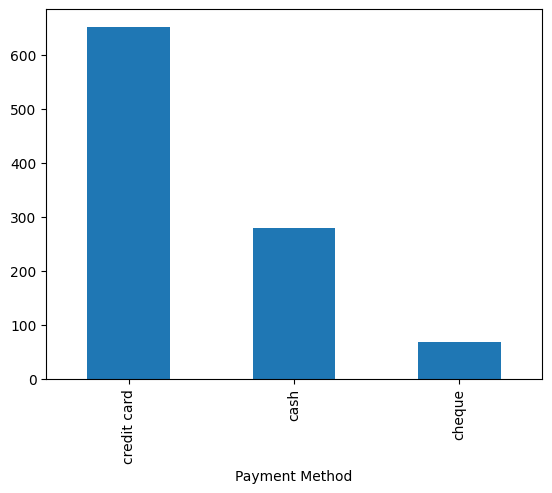

In [ ]:
df['Payment Method'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

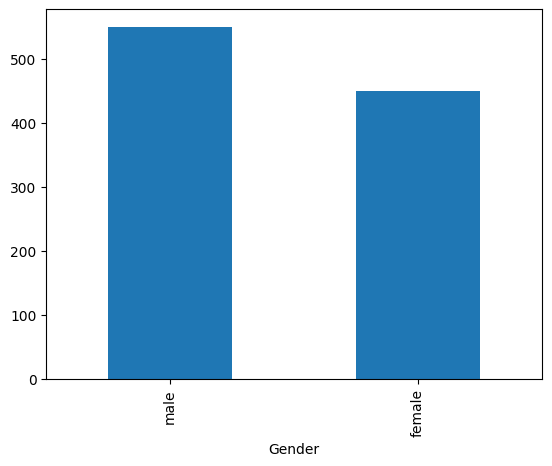

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Future Customer'>

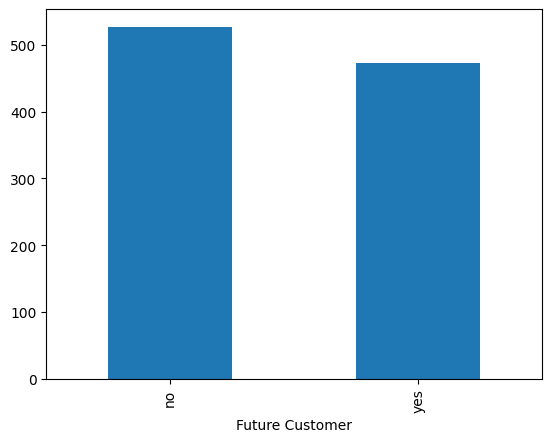

In [ ]:
df['Future Customer'].value_counts().plot(kind='bar')

The `.value_counts()` method in pandas is used to count the occurrences of unique values in a Series (which is essentially a single column of a DataFrame).

When you use `.value_counts()` before `.plot()` on a column (like `df['Gender'].value_counts().plot(kind='bar')`), here's what's happening:

1.  **`.value_counts()`**: This calculates how many times each unique value appears in the 'Gender' column. The result is a new pandas Series where the index is the unique value (e.g., 'male', 'female') and the values are their counts.
2.  **`.plot(kind='bar')`**: This then takes the result of `.value_counts()` and creates a bar plot. The unique values from the `.value_counts()` output become the categories on the x-axis, and their counts become the heights of the bars on the y-axis.

So, the purpose of `.value_counts()` before `.plot()` is to aggregate the data and prepare it in a format that is suitable for creating a bar chart that visualizes the distribution or frequency of categories in a column.

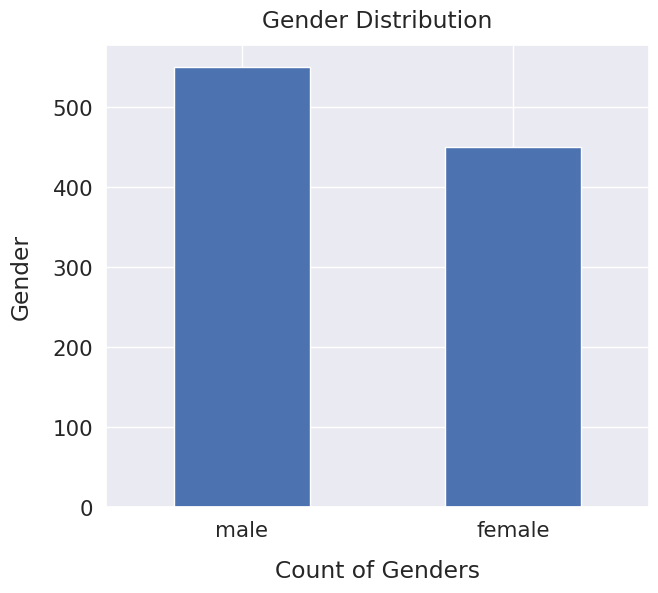

In [ ]:
# Plotting Graphs using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
df['Gender'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel('Count of Genders', labelpad=14)
plt.ylabel('Gender', labelpad=14)
plt.title('Gender Distribution', y=1.02);

In [104]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StockMarketData.csv")
type(df)

pandas.core.frame.DataFrame

In [106]:
df.head().

,Date,Open,High,Low,Close,Volume,Adj Close
0,02/01/2014,555.680008,557.029999,552.020004,553.129990,58671200,74.115916
1,03/01/2014,552.860023,553.699989,540.429993,540.980019,98116900,72.487897
2,06/01/2014,537.450005,546.800018,533.599983,543.929993,103152700,72.883175
3,07/01/2014,544.320015,545.959999,537.919975,540.040024,79302300,72.361944
4,08/01/2014,538.809982,545.559990,538.689980,543.460022,64632400,72.820202


from matplotlib import pyplot as plt
_df_10['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_23['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Open', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='High', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Low', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Close', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [107]:
df['Date'] = pd.to_datetime(df['Date'])

df.plot(x='Date', y=['Open', 'Close', 'Adj Close'], figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open, Close, and Adjusted Close Prices Over Time')
plt.show()

ValueError: time data "13/01/2014" doesn't match format "%m/%d/%Y", at position 7. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

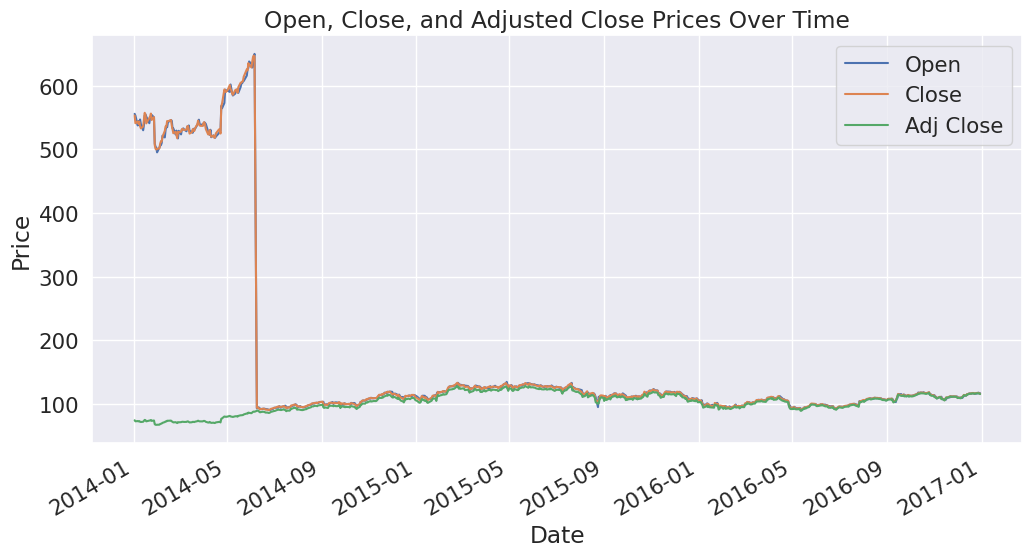

In [108]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # date fixed

df.plot(x='Date', y=['Open', 'Close', 'Adj Close'], figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open, Close, and Adjusted Close Prices Over Time')
plt.show()
